# **Description**


For the CXPT501 final project, you will explore a large dataset that we simulated and modified based on a clinical trial (PIONEER-HF, ClinicalTrials.gov Identifier: NCT02554890).

In this study, researchers compared the effects of sacubitril/valsartan versus enalapril in stabilized acute heart failure patients with reduced ejection fraction.



##*Information included in the dataset*:

*Demographics*
*   Age
*   Sex
*   Race
*   Ethnicity

*Baseline characteristics*
*   Height (cm)
*   Weight (kg)
*   Smoking history
*   Pre-treatment NT-proBNP (pg/mL)
*   Pre-treatment BNP (pg/mL)

*Disease characteristics*
*   Prior use of ACEi/ARB
*   Left ventricular ejection fraction (%)
*   Chronic renal insufficiency

*Intervention*
*   Sacubitril/valsartan
*   Enalapril

*Efficacy outcome*
*   Week 4 NT-proBNP (pg/mL)
*   Week 8 NT-proBNP (pg/mL)

*Safety outcome*
*   Symptomatic hypotension
*   Hyperkalemia
*   Angioedema
*   Death

# **Instructions**

## **Data import (6 points)**

**Import the Python libraries you decide to use here, e.g. Pandas (2 points)**

In [1]:
import pandas as pd

**Download/load your individual dataset (.csv file) (2 points)**

We have prepared a dataset for each of you, labeled by name. Please download or directly import your corresponding data file from https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23. Each dataset contains data for 1 million patients, one per row.

For directly importing your file from GitHub to your Colab notebook, click on your assigned file then right-click the Download button. From there, a drop-down menu like below should appear. Select the option that copies the direct link address to your clipboard, then paste it into your notebook.

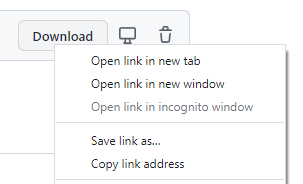

**The drop-down menu shown in Google Chrome.** If you use this web browser, click "Copy link address".

In [2]:
df = pd.read_csv('https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23/raw/main/Kunali_Chetan_Hapani.csv')

**Display the dataset (2 points)**

In [3]:
df

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,44.0,Female,Other,Hispanic or Latino,183.0,73.0,current,6388.090,4771.903,3564.612,1598.351,Yes,28.725,Yes,Enalapril,No,Yes,No
1,68.0,Female,Unknown,Hispanic or Latino,179.0,52.0,former,7378.463,5511.712,4117.249,1614.517,No,36.501,Yes,Enalapril,No,No,No
2,45.0,Male,Pacific Islander,Not Hispanic or Latino,155.0,95.0,never,5791.247,4326.062,3231.568,1643.075,No,39.607,No,Enalapril,Yes,No,Yes
3,75.0,Female,Pacific Islander,Not Hispanic or Latino,176.0,89.0,never,6425.157,4799.592,3585.295,1463.384,Yes,32.634,Yes,Enalapril,No,No,No
4,22.0,Female,Asian,Not Hispanic or Latino,200.0,40.0,former,6214.204,4642.010,3467.581,1394.571,Yes,30.911,Yes,Enalapril,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68.0,Female,Black,Not Hispanic or Latino,189.0,44.0,former,7015.073,3739.034,1992.905,1863.860,No,38.260,Yes,Sacubitril-valsartan,Yes,No,No
996,24.0,Male,Asian,Hispanic or Latino,179.0,88.0,never,7458.161,3975.200,2118.782,1648.805,No,26.439,No,Sacubitril-valsartan,No,No,No
997,31.0,Female,Pacific Islander,Not Hispanic or Latino,192.0,81.0,never,7094.834,3781.547,2015.565,1492.591,Yes,37.884,No,Sacubitril-valsartan,No,No,No
998,19.0,Male,Native American,Hispanic or Latino,190.0,69.0,former,5493.771,2928.180,1560.720,1455.670,No,30.757,Yes,Sacubitril-valsartan,No,No,No


## **Data cleaning (16 points)**


**Please remove all rows that have any NaN value in them (2 points)**

You can confirm that you've done this properly by using:
```
DataFrame.isnull().sum()
```

In [4]:
nan_counts = df.isna().sum()
print(nan_counts)

Age                                       0
Sex                                       0
Race                                      1
Ethnicity                                 0
Height (cm)                               1
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           2
Week 4 NT-proBNP (pg/mL)                  1
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     1
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   2
Hyperkalemia                              0
Death                                     2
dtype: int64


In [5]:
cleaned_df = df.dropna(how='any')

In [6]:
cleaned_df.to_csv('cleaned_df.csv')

**Based on the study's inclusion criteria, please filter out patients who don't meet the following criteria. Store the remaining patient data in a new DataFrame. (8 points)**

*Inclusion criteria*
*   age >= 18
*   pre-treatment NT-proBNP >= 1600 pg/mL
*   pre-treatment BNP >= 400 pg/mL
*   left ventricular ejection fraction <= 40%

You can confirm how many patient entries remain by using:
```
len(DataFrame)
```



In [7]:
new_df = cleaned_df[(cleaned_df['Age'] >= 18) & (cleaned_df['Pre-treatment NT-proBNP (pg/mL)'] >= 1600 )
& (cleaned_df['Pre-treatment BNP (pg/mL)'] >= 400 )
& (cleaned_df['Left ventricular ejection fraction (%)'] <= 40 )]

In [8]:
new_df.to_csv('filtered_df.csv')

In [9]:
new_df.head(5)

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,44.0,Female,Other,Hispanic or Latino,183.0,73.0,current,6388.090,4771.903,3564.612,1598.351,Yes,28.725,Yes,Enalapril,No,Yes,No
1,68.0,Female,Unknown,Hispanic or Latino,179.0,52.0,former,7378.463,5511.712,4117.249,1614.517,No,36.501,Yes,Enalapril,No,No,No
2,45.0,Male,Pacific Islander,Not Hispanic or Latino,155.0,95.0,never,5791.247,4326.062,3231.568,1643.075,No,39.607,No,Enalapril,Yes,No,Yes
3,75.0,Female,Pacific Islander,Not Hispanic or Latino,176.0,89.0,never,6425.157,4799.592,3585.295,1463.384,Yes,32.634,Yes,Enalapril,No,No,No
4,22.0,Female,Asian,Not Hispanic or Latino,200.0,40.0,former,6214.204,4642.010,3467.581,1394.571,Yes,30.911,Yes,Enalapril,No,No,No


In [10]:
len(new_df)

863

**Add a "BMI (kg/m^2)" column to the dataframe by calculating body mass index based on weight and height provided** `BMI = weight(kg)/(height(m)**2)` **where** '`**`' **is  the exponent operator in Python. Be wary of units. (6 points)**

In [11]:
new_df['BMI (kg/m^2)'] = new_df['Weight (kg)'] / (new_df['Height (cm)'] ** 2 )
new_df

<ipython-input-11-10f9904c631a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['BMI (kg/m^2)'] = new_df['Weight (kg)'] / (new_df['Height (cm)'] ** 2 )


,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2)
0,44.0,Female,Other,Hispanic or Latino,183.0,73.0,current,6388.090,4771.903,3564.612,1598.351,Yes,28.725,Yes,Enalapril,No,Yes,No,0.002180
1,68.0,Female,Unknown,Hispanic or Latino,179.0,52.0,former,7378.463,5511.712,4117.249,1614.517,No,36.501,Yes,Enalapril,No,No,No,0.001623
2,45.0,Male,Pacific Islander,Not Hispanic or Latino,155.0,95.0,never,5791.247,4326.062,3231.568,1643.075,No,39.607,No,Enalapril,Yes,No,Yes,0.003954
3,75.0,Female,Pacific Islander,Not Hispanic or Latino,176.0,89.0,never,6425.157,4799.592,3585.295,1463.384,Yes,32.634,Yes,Enalapril,No,No,No,0.002873
4,22.0,Female,Asian,Not Hispanic or Latino,200.0,40.0,former,6214.204,4642.010,3467.581,1394.571,Yes,30.911,Yes,Enalapril,No,No,No,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68.0,Female,Black,Not Hispanic or Latino,189.0,44.0,former,7015.073,3739.034,1992.905,1863.860,No,38.260,Yes,Sacubitril-valsartan,Yes,No,No,0.001232
996,24.0,Male,Asian,Hispanic or Latino,179.0,88.0,never,7458.161,3975.200,2118.782,1648.805,No,26.439,No,Sacubitril-valsartan,No,No,No,0.002746
997,31.0,Female,Pacific Islander,Not Hispanic or Latino,192.0,81.0,never,7094.834,3781.547,2015.565,1492.591,Yes,37.884,No,Sacubitril-valsartan,No,No,No,0.002197
998,19.0,Male,Native American,Hispanic or Latino,190.0,69.0,former,5493.771,2928.180,1560.720,1455.670,No,30.757,Yes,Sacubitril-valsartan,No,No,No,0.001911


## **Data visualization (64 points)**

###**Explore the baseline characteristics among sacubitril/valsartan and enalapril groups (14 points)**

**Categorical Data**
*   Based on your judgement, use one or more of the most appropriate plot types to visualize some aspect of the categorical data. Intervention type must be distinguished by hue.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.



In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

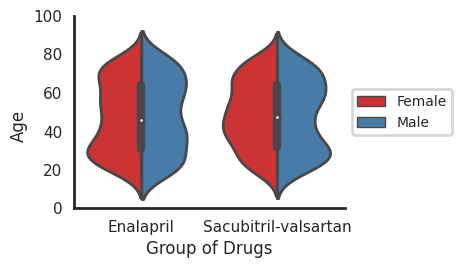

In [45]:
sns.set_style("white")
sns.set_context("poster")
plt.figure(figsize = (3.5,2.5), dpi = 100)
palette = "Set1"
ax = sns.violinplot(data=new_df, x='Group', y='Age',split=True, hue="Sex",linewidth=2, palette=palette)
ax.set_xlabel("Group of Drugs", fontsize=12, x=0.5, y=-0.1)
ax.set_ylabel("Age", fontsize=12, x=-1, y=0.43)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='both', which='both', pad=8)
sns.despine()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.legend_.set_title(None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.yticks([0,20,40,60,80,100])
ax.tick_params(axis='both', length=0)
plt.savefig("Figure1.pdf", bbox_inches='tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks (36 points)**
**Relational Data**
*   Follow the steps below to visualize NT-proBNP concentrations over time with a relational-type plot.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Subset the cleaned and filtered DataFrame into three smaller DataFrames containing the following columns (8 points):
*   Pre-treatment NT-proBNP & Intervention Group
*   Week 4 NT-proBNP & Intervention Group
*   Week 8 NT-proBNP & Intervention Group




In [14]:
subset_1 = cleaned_df[['Pre-treatment NT-proBNP (pg/mL)','Group']]
subset_2 = cleaned_df[['Week 4 NT-proBNP (pg/mL)','Group']]
subset_3 = cleaned_df[['Week 8 NT-proBNP (pg/mL)','Group']]

2) Add a column to each of the three new DataFrames specifying each DataFrame's timepoint. The name of the column should be the same for each DataFrame (6 points).

In [15]:
subset_1['Timepoint'] = 'Pre-treatment'
subset_2['Timepoint'] = 'Week 4'
subset_3['Timepoint'] = 'Week 8'

<ipython-input-15-8ce60d0f5291>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_1['Timepoint'] = 'Pre-treatment'
<ipython-input-15-8ce60d0f5291>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_2['Timepoint'] = 'Week 4'
<ipython-input-15-8ce60d0f5291>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

3) Merge all three of the new DataFrames via the most appropriate method. (6 points)

In [16]:
merged_df = pd.concat([subset_1, subset_2, subset_3])
merged_df = merged_df[['Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)','Week 8 NT-proBNP (pg/mL)', 'Group', 'Timepoint']]
merged_df

,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Group,Timepoint
0,6388.090,NaN,NaN,Enalapril,Pre-treatment
1,7378.463,NaN,NaN,Enalapril,Pre-treatment
2,5791.247,NaN,NaN,Enalapril,Pre-treatment
3,6425.157,NaN,NaN,Enalapril,Pre-treatment
4,6214.204,NaN,NaN,Enalapril,Pre-treatment
...,...,...,...,...,...
995,NaN,NaN,1992.905,Sacubitril-valsartan,Week 8
996,NaN,NaN,2118.782,Sacubitril-valsartan,Week 8
997,NaN,NaN,2015.565,Sacubitril-valsartan,Week 8
998,NaN,NaN,1560.720,Sacubitril-valsartan,Week 8


4 ) Fill in any NaNs in the merged DataFrame with the integer value 0. (2 points)

In [17]:
merged_df_filled = merged_df.fillna(0)
merged_df_filled

,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Group,Timepoint
0,6388.090,0.0,0.000,Enalapril,Pre-treatment
1,7378.463,0.0,0.000,Enalapril,Pre-treatment
2,5791.247,0.0,0.000,Enalapril,Pre-treatment
3,6425.157,0.0,0.000,Enalapril,Pre-treatment
4,6214.204,0.0,0.000,Enalapril,Pre-treatment
...,...,...,...,...,...
995,0.000,0.0,1992.905,Sacubitril-valsartan,Week 8
996,0.000,0.0,2118.782,Sacubitril-valsartan,Week 8
997,0.000,0.0,2015.565,Sacubitril-valsartan,Week 8
998,0.000,0.0,1560.720,Sacubitril-valsartan,Week 8


5) Combine all the columns containing NT-proBNP concentration data into a new, single column. (6 points)

In [18]:
nt_pro_bnp_columns = ['Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)']
merged_df_filled['Combined NT-proBNP'] = merged_df_filled.apply(lambda x: x['Pre-treatment NT-proBNP (pg/mL)']+x['Week 4 NT-proBNP (pg/mL)']+x['Week 8 NT-proBNP (pg/mL)'],axis=1)
merged_df_filled.drop(nt_pro_bnp_columns, axis=1, inplace=True)
print("DataFrame with Combined NT-proBNP column:")
merged_df_filled

DataFrame with Combined NT-proBNP column:


,Group,Timepoint,Combined NT-proBNP
0,Enalapril,Pre-treatment,6388.090
1,Enalapril,Pre-treatment,7378.463
2,Enalapril,Pre-treatment,5791.247
3,Enalapril,Pre-treatment,6425.157
4,Enalapril,Pre-treatment,6214.204
...,...,...,...
995,Sacubitril-valsartan,Week 8,1992.905
996,Sacubitril-valsartan,Week 8,2118.782
997,Sacubitril-valsartan,Week 8,2015.565
998,Sacubitril-valsartan,Week 8,1560.720


6) Use a line plot to graph NT-proBNP concentration over time, with Intervention Group seperated by hue. (8 points)

The arguements you pass to lineplot() should include:
*   `ci='sd'`
*   `err_style='bars'`
*   `marker="o"`



<ipython-input-46-dd5c2ffe2123>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=merged_df_filled, x='Timepoint', y='Combined NT-proBNP', hue='Group', ci='sd', err_style='bars', marker='o')


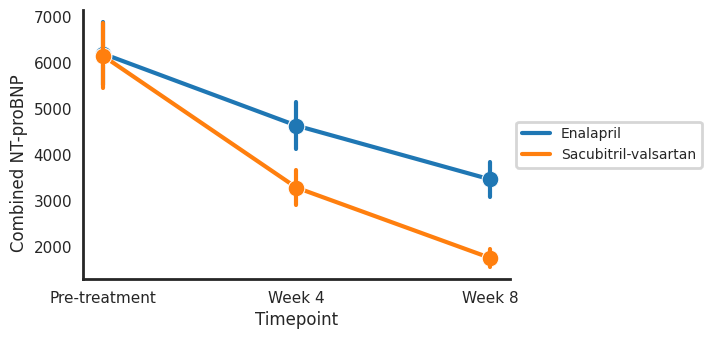

In [46]:
sns.set_style("white")
sns.set_context("poster")
plt.figure(figsize = (5.5,3.5), dpi = 100)
ax = sns.lineplot(data=merged_df_filled, x='Timepoint', y='Combined NT-proBNP', hue='Group', ci='sd', err_style='bars', marker='o')
ax.set_xlabel("Timepoint", fontsize=12, x=0.5, y=-0.1)
ax.set_ylabel("Combined NT-proBNP", fontsize=12, x=-1, y=0.43)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='both', which='both', pad=8)
sns.despine()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.legend_.set_title(None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.tick_params(axis='both', length=0)
plt.savefig("Figure2.pdf", bbox_inches='tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril for a  demographic (8 points)**

**Matrix Data**
*   Follow the steps below to produce a heatmap to visualize NT-proBNP concentration at Week 8 for some demographic of your choice. Intervention type must be an axis of the matrix data.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Contexts

* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Convert your categorical data into matrix data. (4 points)

In [20]:
dfGrouped=df.groupby(['Week 8 NT-proBNP (pg/mL)', 'Group']).mean()
dfGrouped = dfGrouped.reset_index()
dfGrouped.head()

<ipython-input-20-c927d5672489>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfGrouped=df.groupby(['Week 8 NT-proBNP (pg/mL)', 'Group']).mean()


,Week 8 NT-proBNP (pg/mL),Group,Age,Height (cm),Weight (kg),Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%)
0,1484.909,Sacubitril-valsartan,62.0,201.0,82.0,5226.913,2785.945,1542.332,31.636
1,1485.527,Sacubitril-valsartan,46.0,177.0,41.0,5229.091,2787.106,1589.306,25.316
2,1486.302,Sacubitril-valsartan,76.0,179.0,64.0,5231.820,2788.560,1866.323,33.959
3,1486.381,Sacubitril-valsartan,28.0,209.0,88.0,5232.098,2788.708,1482.825,29.952
4,1488.150,Sacubitril-valsartan,44.0,155.0,100.0,5238.325,2792.027,1379.143,34.707


In [21]:
matrixDF = dfGrouped.pivot('Week 8 NT-proBNP (pg/mL)', 'Group', 'Age')
matrixDF.head()

<ipython-input-21-68dbba31c34e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrixDF = dfGrouped.pivot('Week 8 NT-proBNP (pg/mL)', 'Group', 'Age')


Group,Enalapril,Sacubitril-valsartan
Week 8 NT-proBNP (pg/mL),,
1484.909,NaN,62.0
1485.527,NaN,46.0
1486.302,NaN,76.0
1486.381,NaN,28.0
1488.150,NaN,44.0


2) Plot a heatmap from your matrix data. It is okay if it does not look very complex. (4 points)

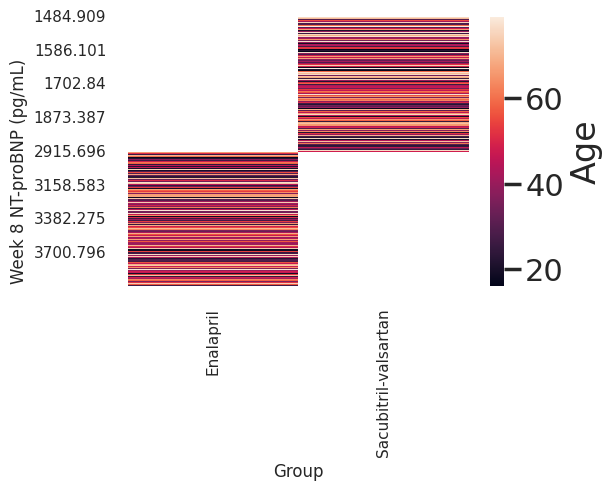

In [48]:
sns.set_context("poster")
plt.figure(figsize = (5.5,3.5), dpi = 100)
ax = sns.heatmap(data=matrixDF, cbar_kws={'label': 'Age'})
ax.set(xlabel='Week 8 NT-proBNP (pg/mL)', ylabel='Group')
ax.set_xlabel("Group", fontsize=12, x=0.5, y=-0.1)
ax.set_ylabel("Week 8 NT-proBNP (pg/mL)", fontsize=12, x=-1, y=0.43)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.savefig("Figure3.pdf", bbox_inches='tight')

## **Statistical analysis (20 points)**

**Explore the safety of sacubitril/valsartan and enalapril in this stabilized acute heart failure patient population**

Please provide the following statistical measures for various characteristics, including BMI, and group the results by the intervention type (sacubitril/valsartan and enalapril):

**For Sacubitril/Valsartan Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.

**For Enalapril Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.  (4 points)

In [23]:
import pandas as pd
import numpy as np

In [24]:
sacubitril_valsartan_data = new_df[new_df['Group'] == 'Sacubitril-valsartan']
characteristics = ['Age',	'Sex',	'Race', 'Ethnicity',	'Height (cm)',	'Weight (kg)',	'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',	'Pre-treatment BNP (pg/mL)',	'Prior use of ACEi/ARB',	'Left ventricular ejection fraction (%)',	'Chronic renal insufficiency',	'Group',	'Symptomatic hypotension',	'Hyperkalemia',	'Death',	'BMI (kg/m^2)']
stats_sacubitril_valsartan = sacubitril_valsartan_data[characteristics].describe()
print("Statistics for Sacubitril-valsartan Group:")
stats_sacubitril_valsartan

Statistics for Sacubitril-valsartan Group:


,Age,Height (cm),Weight (kg),Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI (kg/m^2)
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,48.383178,181.897196,81.535047,6165.830044,3286.387388,1751.644465,1531.844213,31.208126,0.002525
std,17.833419,17.478490,23.307559,708.074879,377.403914,201.156296,171.014149,3.992043,0.000866
min,18.000000,152.000000,40.000000,5226.913000,2785.945000,1484.909000,1300.505000,25.013000,0.000925
25%,32.000000,167.000000,61.000000,5571.145750,2969.420750,1582.701500,1397.732500,27.871500,0.001888
50%,47.500000,181.000000,82.000000,6010.363000,3203.523500,1707.478000,1501.404500,30.455500,0.002395
75%,64.000000,197.000000,102.000000,6640.447500,3539.358500,1886.478250,1623.920250,34.440750,0.003083
max,79.000000,212.000000,119.000000,8541.769000,4552.763000,2426.623000,2168.077000,39.874000,0.004998


In [25]:
enalapril_data = new_df[new_df['Group'] == 'Enalapril']
characteristics = ['Age',	'Sex',	'Race', 'Ethnicity',	'Height (cm)',	'Weight (kg)',	'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',	'Pre-treatment BNP (pg/mL)',	'Prior use of ACEi/ARB',	'Left ventricular ejection fraction (%)',	'Chronic renal insufficiency',	'Group',	'Symptomatic hypotension',	'Hyperkalemia',	'Death',	'BMI (kg/m^2)']
stats_enalapril = enalapril_data[characteristics].describe()
print("Statistics for Enalapril")
stats_enalapril

Statistics for Enalapril


,Age,Height (cm),Weight (kg),Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI (kg/m^2)
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,47.556322,183.928736,80.448276,6202.546451,4633.302186,3461.076738,1530.656329,31.000432,0.002444
std,18.709849,17.793541,23.117591,686.647365,512.925551,383.155384,180.457607,3.863259,0.000861
min,18.000000,152.000000,40.000000,5225.177000,3903.207000,2915.696000,1301.841000,25.030000,0.000890
25%,31.000000,170.000000,62.000000,5659.668500,4227.772500,3158.146000,1380.925000,27.671000,0.001779
50%,46.000000,182.000000,80.000000,6061.326000,4527.811000,3382.275000,1486.169000,30.583000,0.002366
75%,64.000000,199.000000,101.000000,6625.160500,4948.994500,3696.898500,1640.513000,33.447000,0.003024
max,79.000000,212.000000,119.000000,8552.588000,6388.783000,4772.421000,2168.434000,39.996000,0.004955


What statistical test should be employed to analyze the effectiveness of the new heart failure medication formulations developed by two pharmaceutical companies, sacubitril and enalapril, with respect to their claims of reducing NT-proBNP levels? The claims state that sacubitril reduces NT-proBNP levels by an average of 3000 within 4 weeks and 2000 within 8 weeks, while enalapril reduces NT-proBNP levels by an average of 2500 within 4 weeks and 1500 within 8 weeks. A clinical trial was conducted using samples from both companies, and the objective is to determine which formulation is more effective.

Clearly state your hypotheses for the combinations of analyses and do the significance test accordingly:

1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)
   

In [26]:
import scipy.stats as stats


***Two-sided:***

$$ H_0: μ_d = 0 $$
$$ H_1: μ_d ≠ 0 $$

***One-sided examples:***

$$ H_0: μ_d = 0 $$
$$ H_1: μ_d < 0 $$


$$or$$

$$ H_0: μ_d = 0 $$
$$ H_1: μ_d > 0 $$


In [27]:
sacubitril_data = new_df[new_df['Group'] == 'Sacubitril-valsartan']
enalapril_data = new_df[new_df['Group'] == 'Enalapril']

In [28]:
stats.ttest_rel(sacubitril_data['Week 4 NT-proBNP (pg/mL)'],sacubitril_data['Pre-treatment NT-proBNP (pg/mL)'])

TtestResult(statistic=-180.14999548121133, pvalue=0.0, df=427)

In [29]:
stats.ttest_rel(sacubitril_data['Week 8 NT-proBNP (pg/mL)'],sacubitril_data['Pre-treatment NT-proBNP (pg/mL)'])

TtestResult(statistic=-180.14999731090614, pvalue=0.0, df=427)

In [30]:
stats.ttest_rel(enalapril_data['Week 4 NT-proBNP (pg/mL)'],enalapril_data['Pre-treatment NT-proBNP (pg/mL)'])

TtestResult(statistic=-188.39996747185023, pvalue=0.0, df=434)

In [31]:
stats.ttest_rel(enalapril_data['Week 8 NT-proBNP (pg/mL)'],enalapril_data['Pre-treatment NT-proBNP (pg/mL)'])

TtestResult(statistic=-188.3999834109858, pvalue=0.0, df=434)

Since the p-value is < 0.05, we reject the null hypothesis and there is a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP and between week 4 NT-proBNP and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups.


***Two-sided:***

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ ≠ u_2 $$

***One-sided examples:***

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ_1 < u_2 $$

$$or$$

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ_1 > u_2 $$

In [32]:
between_week4 = stats.ttest_ind(sacubitril_data['Week 4 NT-proBNP (pg/mL)'], enalapril_data['Week 4 NT-proBNP (pg/mL)'])
print("Between Groups - Week 4:", between_week4)

Between Groups - Week 4: TtestResult(statistic=-43.8815603393049, pvalue=8.494752104952779e-222, df=861.0)


In [33]:
between_week8 = stats.ttest_ind(sacubitril_data['Week 8 NT-proBNP (pg/mL)'], enalapril_data['Week 8 NT-proBNP (pg/mL)'])
print("Between Groups - Week 8:", between_week8)

Between Groups - Week 8: TtestResult(statistic=-81.8637231451861, pvalue=0.0, df=861.0)


Since the p-value is < 0.05, we reject the null hypothesis and there is a statistically significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril) and NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril).

In [34]:
sacubitril_data_abovesixty = sacubitril_data.loc[sacubitril_data['Age'] >= 60]
enalapril_data_abovesixty = enalapril_data.loc[enalapril_data['Age'] >= 60]
between_week4 = stats.ttest_ind(sacubitril_data_abovesixty['Week 4 NT-proBNP (pg/mL)'], enalapril_data_abovesixty['Week 4 NT-proBNP (pg/mL)'])
print("Between Groups - Week 4:", between_week4)

Between Groups - Week 4: TtestResult(statistic=-25.26110473034404, pvalue=1.599754670179854e-73, df=274.0)


In [35]:
sacubitril_data_abovesixty = sacubitril_data.loc[sacubitril_data['Age'] >= 60]
enalapril_data_abovesixty = enalapril_data.loc[enalapril_data['Age'] >= 60]
between_week8 = stats.ttest_ind(sacubitril_data_abovesixty['Week 8 NT-proBNP (pg/mL)'], enalapril_data_abovesixty['Week 8 NT-proBNP (pg/mL)'])
print("Between Groups - Week 8:", between_week8)

Between Groups - Week 8: TtestResult(statistic=-47.62272996855493, pvalue=1.4852249329517638e-134, df=274.0)


Since the p-value is < 0.05, we reject the null hypothesis and there is a statistically significant difference in participants aged 60 and older in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril) and NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril).

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

Since the p-value is < 0.05, we reject the null hypothesis and there is a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP and between week 4 NT-proBNP and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups.

In [36]:
%%bash
rm -rf /content/sample_data

In [37]:
%%bash
cat > .gitignore

In [38]:
%%bash
git config --global user.email "kunalihapani2000@gmail.com"
git config --global user.name "Kunali Hapani"

In [39]:
%%bash
git init

Initialized empty Git repository in /content/.git/


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>


In [40]:
%%bash
mkdir data code results figures

In [41]:
%%bash
cat > README.md

In [42]:
%%bash
cd data
cat > README.md
This directory contains cleaned_df.csv and filtered_df.csv and this is referenced by Project_CXPT501_Final_Public.ipynb in the code directory

In [43]:
%%bash
cd code
cat > README.md
This directory contains Project_CXPT501_Final_Public.ipynb file and results and figures generated are stored in results and figures directory

In [44]:
%%bash
cd results
cat > README.md
This directory contains all results

In [49]:
%%bash
cd figures
cat > README.md
This directory contains Figure1.pdf, Figure2.pdf, and Figure3.pdf

In [50]:
%%bash
mv cleaned_df.csv data
mv filtered_df.csv data